In [1]:
import os 
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#Enable cuda if cuda is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device, "is available ")

cuda is available 


In [85]:
class Autoencoder(nn.Module):
    
    def __init__(self, seed):
        super(Autoencoder, self).__init__()
        self.seed = torch.manual_seed(seed)
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1,3,kernel_size=3, stride=2),
            nn.Conv2d(3,10, kernel_size=3, stride=2)
        )
        
    def forward(self,x):
        x = F.relu(self.encoder(x))
        return x

In [86]:
model = Autoencoder(1)

In [87]:
model

Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(1, 3, kernel_size=(3, 3), stride=(2, 2))
    (1): Conv2d(3, 10, kernel_size=(3, 3), stride=(2, 2))
  )
)

In [88]:
model.encoder[0].weight.shape

torch.Size([3, 1, 3, 3])

In [89]:
data = Image.open("./dogs/0.png")


In [90]:
image = plt.imread("./dogs/0.png")[:,:,0]

In [91]:
image = image.reshape(1,1,64,64)

In [92]:
image = torch.from_numpy(image)

In [93]:
data = model.forward(image)

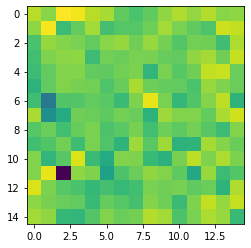

In [94]:
plt.imshow(data.detach().numpy()[0][2])

In [96]:
data.shape

torch.Size([1, 10, 15, 15])